## Loading the data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
file_url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(file_url)

## Exploring the data


In [2]:
print("--- First 5 Rows ---")
df.head()

--- First 5 Rows ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("\n--- Dataframe Info ---")
df.info()


--- Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

In [4]:
print("\n--- Numerical Summary ---")
df.describe()


--- Numerical Summary ---


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Cleaning and transforming the data


In [5]:
# 1. Convert 'TotalCharges' to a numeric type.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [6]:
print("--- Missing Values After Conversion ---")
df.isnull().sum()

--- Missing Values After Conversion ---


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# 3. Drop rows with missing values
df.dropna(inplace=True)

In [8]:
# 4. Verify the cleaning.
print("\n--- Dataframe Info After Cleaning ---")
df.info()


--- Dataframe Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  Paperles

## Visualizing the data


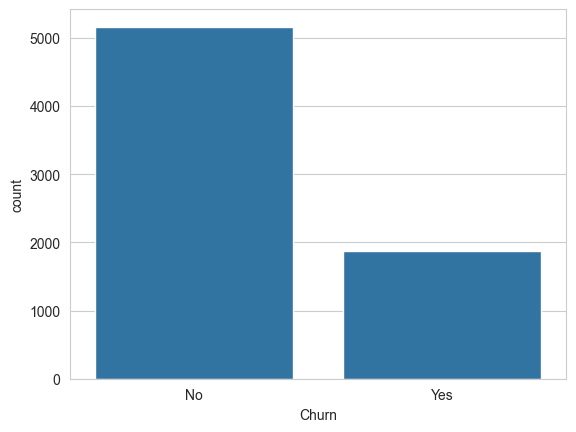

In [9]:
import seaborn as sns

# Set a style for the plots for better aesthetics
sns.set_style("whitegrid")

# Create the count plot for the 'Churn' column.
sns.countplot(x="Churn", data=df)

# Display the plot
plt.show()

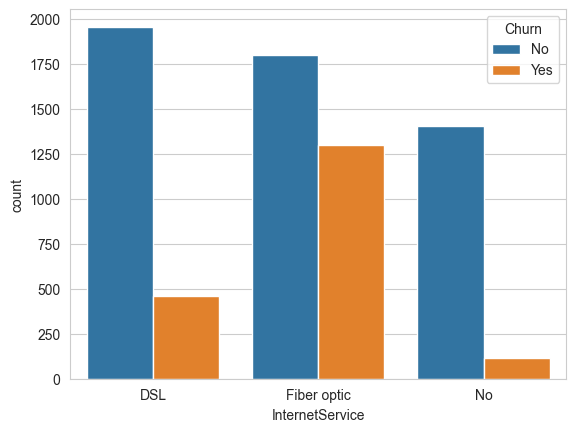

In [10]:
# Create a count plot for 'InternetService', split by 'Churn'
sns.countplot(x='InternetService', data=df, hue='Churn')
plt.show()

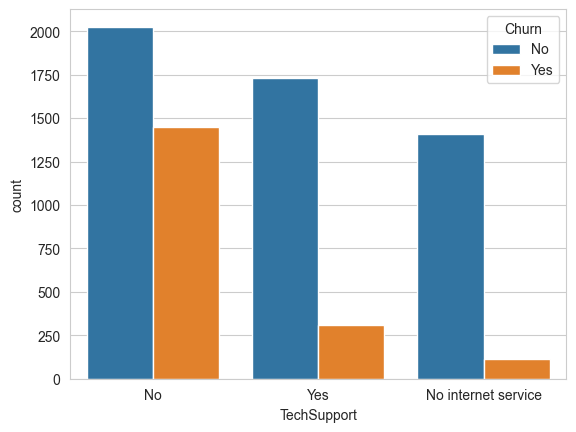

In [11]:
sns.countplot(x='TechSupport', data=df, hue='Churn')
plt.show()

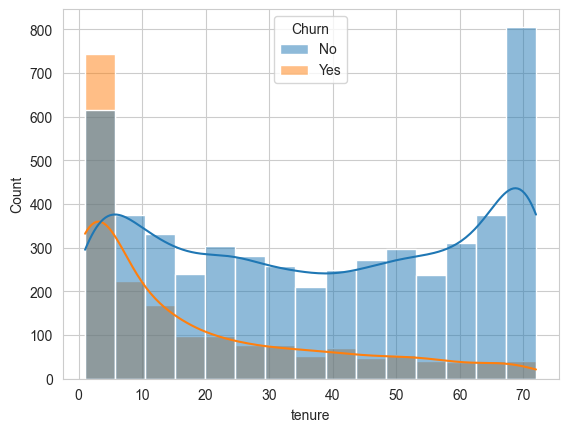

In [12]:
# Create a histogram for 'tenure', split by 'Churn'
sns.histplot(x='tenure', data=df, hue='Churn', kde=True)
plt.show()

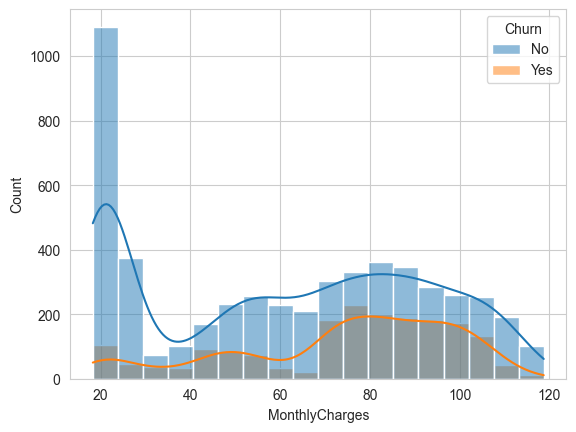

In [13]:
# Create a histogram for 'MonthlyCharges', split by 'Churn'
sns.histplot(x='MonthlyCharges', data=df, hue='Churn', kde=True)
plt.show()

## Preprocessing the data


In [14]:
# Drop customerID, then create dummy variables
df = df.drop('customerID', axis=1)
df_processed = pd.get_dummies(df, drop_first=True)
print("Shape of processed DataFrame:", df_processed.shape)

Shape of processed DataFrame: (7032, 31)


## Splitting the data for training


In [15]:
from sklearn.model_selection import train_test_split
X = df_processed.drop('Churn_Yes', axis=1)
y = df_processed['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (7032, 30)
Shape of y (target): (7032,)


## Scaling and training the data


-- Logistic Regression --


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on the SCALED data
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Get predictions and the REAL report
predictions = log_model.predict(X_test_scaled)
# Print the final, definitive results
print("--- Final Confusion Matrix ---")
print(confusion_matrix(y_test, predictions))
print("\n--- Final Classification Report ---")
print(classification_report(y_test, predictions))

--- Final Confusion Matrix ---
[[915 118]
 [181 193]]

--- Final Classification Report ---
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



-- Decison Tree Classifier --


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1. Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# 2. Make predictions on the scaled test data
tree_predictions = tree_model.predict(X_test_scaled)

# 3. Evaluate the model's performance
print("--- Decision Tree Classification Report ---")
print(classification_report(y_test, tree_predictions))

--- Decision Tree Classification Report ---
              precision    recall  f1-score   support

       False       0.82      0.80      0.81      1033
        True       0.48      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.72      0.73      1407



-- Random Forest Classifier --


In [18]:
from sklearn.ensemble import RandomForestClassifier

# 1. Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 2. Make predictions
rf_predictions = rf_model.predict(X_test_scaled)

# 3. Evaluate the model
print("--- Random Forest Classification Report ---")
print(classification_report(y_test, rf_predictions))

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

       False       0.82      0.90      0.86      1033
        True       0.63      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



-- XGB Classifier --


In [19]:
%pip install xgboost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective="binary:logistic", use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# 2. Make predictions
xgb_predictions = xgb_model.predict(X_test_scaled)

# 3. Evaluate the model
print("--- XGBoost Classification Report ---")
print(classification_report(y_test, xgb_predictions))

Note: you may need to restart the kernel to use updated packages.
--- XGBoost Classification Report ---
              precision    recall  f1-score   support

       False       0.83      0.87      0.85      1033
        True       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407



/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:44:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [20]:
import tensorflow as tf
from tensorflow import keras

# Define the model's architecture
model = keras.Sequential([
    # Hidden Layer 1: 32 neurons, 'relu' activation function
    keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    
    # Hidden Layer 2: 16 neurons, also using 'relu'
    keras.layers.Dense(16, activation='relu'),
    
    # Output Layer: 1 neuron, 'sigmoid' for a 0-1 probability output
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model, telling it how to learn
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/opt/anaconda3/envs/ml-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train_scaled, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.6328 - loss: 0.6042 - val_accuracy: 0.7929 - val_loss: 0.4407
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.7989 - loss: 0.4401 - val_accuracy: 0.8089 - val_loss: 0.4183
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.7967 - loss: 0.4276 - val_accuracy: 0.8116 - val_loss: 0.4098
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8117 - loss: 0.4052 - val_accuracy: 0.8187 - val_loss: 0.4065
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.8116 - loss: 0.4084 - val_accuracy: 0.8142 - val_loss: 0.4039
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.8091 - loss: 0.4004 - val_accuracy: 0.8098 - val_loss: 0.4065
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.8057 - loss: 0.4173 - val_accuracy: 0.8107 - val_loss: 0.4038
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.8188 - loss: 0.3993 - 

In [23]:
# 1. Get predictions from the model (as probabilities)
nn_probabilities = model.predict(X_test_scaled)

# 2. Convert probabilities to class labels (0 or 1)
nn_predictions = (nn_probabilities >0.5).astype(int)

# 3. Evaluate the model's performance
print("--- Neural Network Classification Report ---")
print(classification_report(y_test, nn_predictions))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
--- Neural Network Classification Report ---
              precision    recall  f1-score   support

       False       0.84      0.87      0.85      1033
        True       0.59      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



## Model Deployment


In [24]:
import joblib

# Retraining Logisitc Regression model on scaled training data set to maximize accuracy
final_model = LogisticRegression()
final_model.fit(X_train_scaled, y_train)

# Save the trained model to a file
joblib.dump(final_model, "churn_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Save the columns
joblib.dump(X.columns, 'model_columns.pkl')

['model_columns.pkl']